INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a1a88bbb98e9666bb09ff89c8ee8c169 NOW.


Inference for Stan model: anon_model_a1a88bbb98e9666bb09ff89c8ee8c169.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu               3.13  9.7e-3   0.22   2.74   2.97   3.13   3.27   3.55    499    1.0
kappa            7.26    0.51   5.26    3.0   4.67   6.04   8.28  18.76    107   1.04
lSimData[1]      3.12    0.05   2.15    0.0    2.0    3.0    4.0    8.0   2025    1.0
lSimData[2]      3.16    0.05   2.27    0.0    1.0    3.0    4.0    8.0   1974    1.0
lSimData[3]      3.17    0.05   2.28    0.0    1.0    3.0    4.0    9.0   1826    1.0
lSimData[4]      3.13    0.05   2.18    0.0    2.0    3.0    4.0    8.0   1962    1.0
lSimData[5]      3.14    0.05   2.16    0.0    2.0    3.0    4.0    8.0   1701    1.0
lSimData[6]       3.2    0.05   2.16    0.0    2.0    3.0    4.0    8.0   1912    1.0
lSimData[7]      3.16    0.05   2.18   

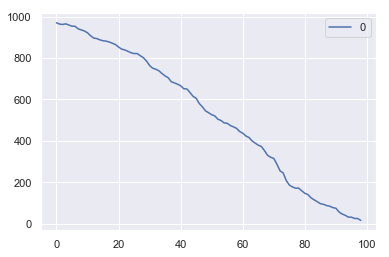

In [2]:
'''
Problem 16.1 Discoveries data revisited
Ben Lambert 'A Student's Guide to Bayesian Statistics'
'''

import pystan as stan
import pandas as pd
import numpy as np
import seaborn as sns

#nice plot aesthetic
sns.set()  
%matplotlib inline

    
#Read data
data=pd.read_csv("C:\\all_data\\evaluation_discoveries.csv")
#data.head() # Preview the first 5 lines of the loaded data 
#data.describe()

#Specify data for Stan model
N=data[['time']].count()[0] #Number of years in data
X=data.loc[:,'discoveries'].values #get values from panda into array

#Fit Stan model
model = stan.StanModel(file='discoveries_negbin.stan')
fit = model.sampling(data={'N':N,'X':X},iter=1000,chains=4, seed=1)

print(fit)

#print specific credible interval
percentiles = (0.1,0.9)              # edit these at will
print(stan.stansummary(fit, probs=percentiles, digits_summary=2)) #or lambda_samples = fit.extract('lambda')['lambda'] 
                                                                     #np.percentile(lambda_samples, (10, 90))
#Plot histograms of the parameter and the data
#sns.distplot(fit['lambda'])
#sns.distplot(X)


#Calculate autocorrelation betwen data and posterior
result = np.correlate(np.mean(fit['lSimData'],0), X, mode='full')
result=result[100:]
autocorr=pd.DataFrame(result)
sns.lineplot(data=autocorr) #plot the autocorrelation